In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, f_regression
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [33]:
df= pd.read_csv(r"E:\machine learning auc data\archive (3)\marketing_campaign.csv", sep='\t')


In [34]:
df.columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [35]:
df.isnull().sum()
df.dropna(inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Customer_Since_Days'] = (pd.to_datetime('today') - df['Dt_Customer']).dt.days


In [36]:
x= df.drop(['Income','ID', 'Response'], axis=1)
y_reg = df['Income']
y_cls = df['Response']
x_train, x_test, y_train_reg, y_test_reg = train_test_split(x, y_reg, test_size=0.2, random_state=42)
x_train, x_test, y_train_cls, y_test_cls = train_test_split(x, y_cls, test_size=0.2, random_state=42)
numeric_features = x.select_dtypes(include=['int64', 'float64']).columns
categorical_features = x.select_dtypes(include=['object']).columns
ct = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])
x_train= ct.fit_transform(x_train)
x_test = ct.transform(x_test)
models= {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(probability=True),
    'Gaussian NB': GaussianNB(),   
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'SVR': SVR()
}
results_cls = {}
results_reg = {}
for name, model in models.items():
    if name in ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'SVR']:
        model.fit(x_train, y_train_reg)
        y_pred = model.predict(x_test)
        mse = mean_squared_error(y_test_reg, y_pred)
        r2 = r2_score(y_test_reg, y_pred)
        mae = mean_absolute_error(y_test_reg, y_pred)
        results_reg[name] = {
            'MSE': mse,
            'R2': r2,
            'MAE': mae
        }
        print(f"{name} - MSE: {mse}, R2: {r2}, MAE: {mae}")
    else:
        model.fit(x_train, y_train_cls)
        y_pred = model.predict(x_test)
        accuracy = accuracy_score(y_test_cls, y_pred)
        cm = confusion_matrix(y_test_cls, y_pred)
        class_report = classification_report(y_test_cls, y_pred)
        results_cls[name] = {
            'Accuracy': accuracy,
            'Confusion Matrix': cm,
            'Classification Report': class_report
                 }
        print(f"{name} - Accuracy: {accuracy}")

Logistic Regression - Accuracy: 0.8873873873873874
KNN - Accuracy: 0.8761261261261262
Decision Tree - Accuracy: 0.8198198198198198
Random Forest - Accuracy: 0.8716216216216216
SVC - Accuracy: 0.8716216216216216
Gaussian NB - Accuracy: 0.8153153153153153
Linear Regression - MSE: 111282814.81676453, R2: 0.7744412912917324, MAE: 7218.686378506539
Lasso Regression - MSE: 111204891.07515635, R2: 0.7745992346234483, MAE: 7216.790016104304
Ridge Regression - MSE: 111169729.90195093, R2: 0.7746705026699829, MAE: 7215.458317682153
SVR - MSE: 488836261.6708736, R2: 0.009179664139405408, MAE: 18197.6565038378


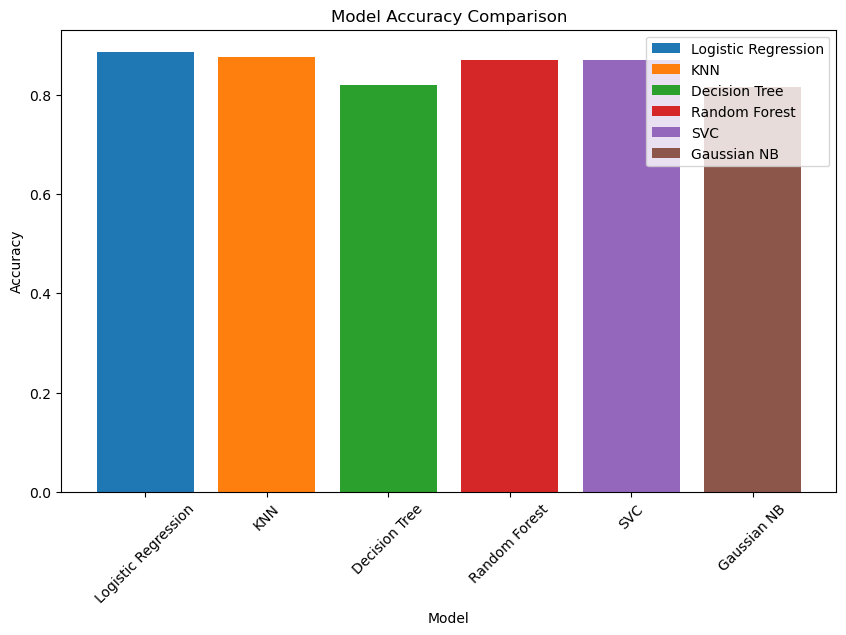

In [37]:
plt.figure(figsize=(10, 6))
for name, result in results_cls.items():
    plt.bar(name, result['Accuracy'], label=name)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Linear Regression - MSE: 111282814.81676453, R2: 0.7744412912917324, MAE: 7218.686378506539
Lasso Regression - MSE: 111204891.07515635, R2: 0.7745992346234483, MAE: 7216.790016104304
Ridge Regression - MSE: 111169729.90195093, R2: 0.7746705026699829, MAE: 7215.458317682153
SVR - MSE: 488836261.6708736, R2: 0.009179664139405408, MAE: 18197.6565038378


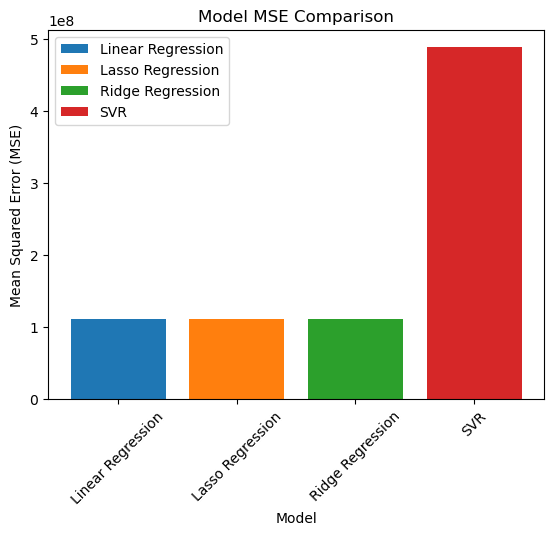

In [38]:
for name, result in results_reg.items():
    print(f"{name} - MSE: {result['MSE']}, R2: {result['R2']}, MAE: {result['MAE']}")
for name, result in results_reg.items():
    plt.bar(name, result['MSE'], label=name)
plt.xlabel('Model')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Model MSE Comparison')
plt.xticks(rotation=45)
plt.legend()
plt.show()
                   


c:\Users\abdok\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


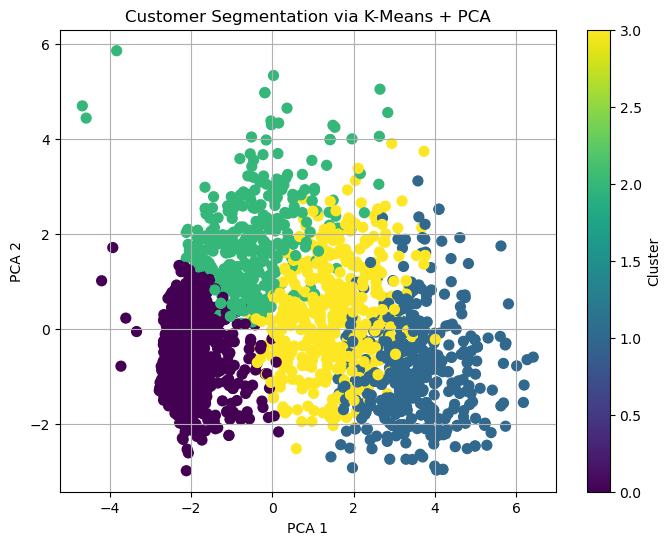

Cluster Summary (Averages):
          Income  MntWines  MntMeatProducts  NumWebPurchases  \
Cluster                                                        
0        35907.6      38.2             20.3              2.0   
1        76546.4     556.8            498.8              5.0   
2        48576.6     326.0             95.2              5.9   
3        67698.5     618.1            239.0              6.2   

         NumStorePurchases  Customer_Since_Days  
Cluster                                          
0                      3.2               4349.1  
1                      8.3               4412.7  
2                      5.9               4525.6  
3                      8.9               4401.5  


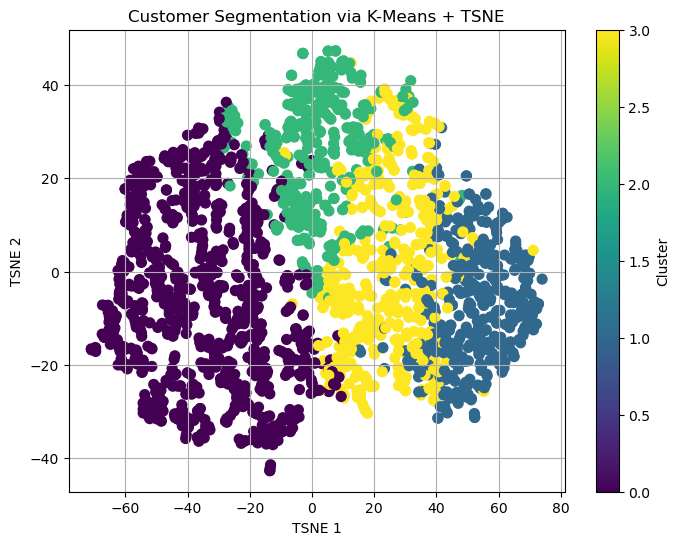

In [39]:
cluster_features = df[[
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth', 'Customer_Since_Days'
]]
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(cluster_scaled)
df['Cluster'] = clusters
pca = PCA(n_components=2)
components = pca.fit_transform(cluster_scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', s=50)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Customer Segmentation via K-Means + PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

cluster_summary = df.groupby('Cluster')[[
    'Income', 'MntWines', 'MntMeatProducts', 'NumWebPurchases',
    'NumStorePurchases', 'Customer_Since_Days'
]].mean().round(1)

print("Cluster Summary (Averages):")
print(cluster_summary)
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(cluster_scaled)
plt.figure(figsize=(8,6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=clusters
, cmap='viridis', s=50)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('Customer Segmentation via K-Means + TSNE')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
